In [479]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression

In [480]:
df = pd.read_csv('LifeExpectancyClean.csv', index_col=0)

In [481]:
cols = ['Adult Mortality',
       'Alcohol', 'Percentage Expenditure',
       'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS','Population', 'Thinness 1-19 Years',
       'Income Composition of Resources', 'Schooling',
       'PopulationDensity', 'Population Growth Rate',
       'HealthyWeightBMI', 'ObesityBMI',
       'HighIncome', 'LowIncome',
       'Human Rights', 'Armed Personnel',
       'Suicide Rate', 'Agriculture Employment']

cols_ext = ['Life Expectancy', 'Adult Mortality',
       'Alcohol', 'Percentage Expenditure',
       'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'Thinness 1-19 Years',
       'Income Composition of Resources', 'Schooling',
       'PopulationDensity', 'Population Growth Rate',
       'HealthyWeightBMI', 'ObesityBMI',
       'HighIncome', 'LowIncome',
       'Human Rights', 'Armed Personnel',
       'Suicide Rate', 'Agriculture Employment']

## Feature Selection

### Mutual Information: 
Mutual Information measures the dependency between two variables. Higher mutual information means a stronger relationship.

Adult Mortality                    1.190918
Income Composition of Resources    0.879916
Thinness 1-19 Years                0.781928
Schooling                          0.651934
Human Rights                       0.526414
HIV/AIDS                           0.517027
Agriculture Employment             0.493849
Population Growth Rate             0.430367
Armed Personnel                    0.357288
Suicide Rate                       0.330082
Alcohol                            0.329248
Polio                              0.317709
Population                         0.299579
Diphtheria                         0.298523
Percentage Expenditure             0.293926
HealthyWeightBMI                   0.278418
Total Expenditure                  0.261564
PopulationDensity                  0.227109
LowIncome                          0.166591
HighIncome                         0.163192
ObesityBMI                         0.009743
dtype: float64


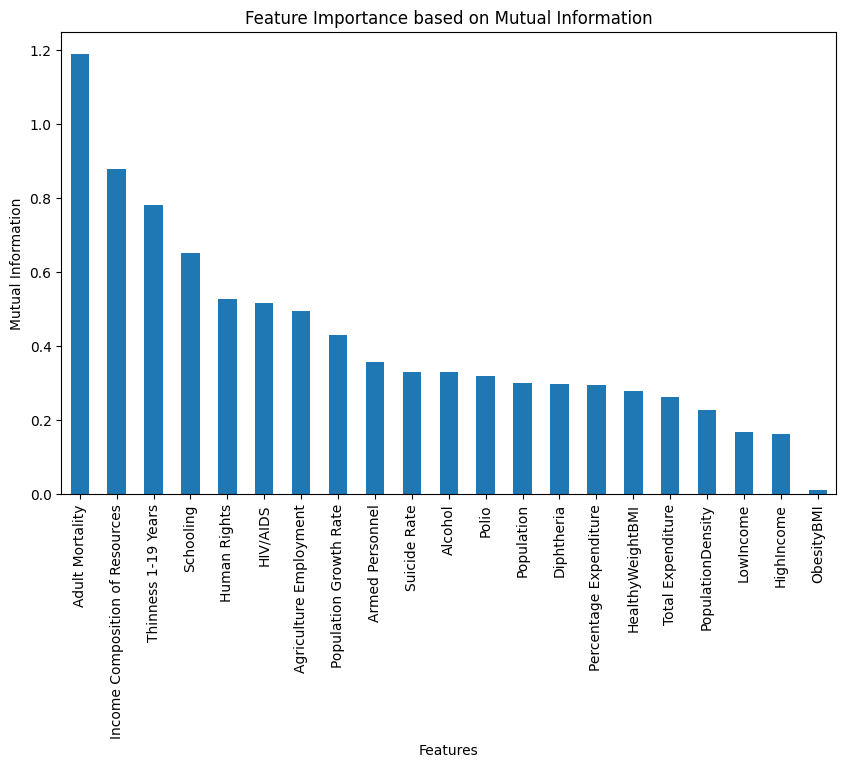

In [482]:
# Independent variables (X) and dependent variable (y)
X = df[cols]  # Independent variables
y = df['Life Expectancy']  # Dependent variable

# Calculate mutual information between each feature and the target
mi = mutual_info_regression(X, y)

# Display the feature importance, sorted in descending order
feature_importance = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()


## Multiple Linear Regression Model

In [483]:
# Preprocess the data
X = df[cols]  # Independent variables
y = df['Life Expectancy']  # Dependent variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R^2: {r2}')

# Interpret the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

MAE: 2.689529719336246
MSE: 14.17888792530777
RMSE: 3.765486412843335
R^2: 0.8373742301188164
Intercept: 59.55529604368289
Coefficients: [-1.47485092e-02  2.91532129e-02  2.42927783e-04  1.86240074e-02
  3.11195496e-03  3.47212426e-02 -5.86775615e-01  3.36468308e-09
 -3.00919516e-02  5.82989073e+00  4.94362979e-01  8.33900629e-04
 -4.26674537e+01 -3.08881534e+00  7.21169841e-01  1.34901347e+00
 -1.37984215e+00  2.26353249e+00  7.52197258e-01 -1.41877054e-01
  1.00962765e-05]


### Test Multicollinearity Using VIF

In [484]:
X_with_const = sm.add_constant(df[cols])

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)


                           Variable        VIF
0                             const  83.288349
1                   Adult Mortality   1.506560
2                           Alcohol   1.994897
3            Percentage Expenditure   1.923371
4                             Polio   1.936151
5                 Total Expenditure   1.244430
6                        Diphtheria   1.946911
7                          HIV/AIDS   1.177548
8                        Population   1.163386
9               Thinness 1-19 Years   1.880783
10  Income Composition of Resources   3.004867
11                        Schooling   3.853835
12                PopulationDensity   1.214944
13           Population Growth Rate   1.451218
14                 HealthyWeightBMI   2.423653
15                       ObesityBMI   1.071231
16                       HighIncome   2.058906
17                        LowIncome   1.542343
18                     Human Rights   1.759995
19                  Armed Personnel   1.265313
20           

### Diagnostic Plots

## Feature Importance

### Random Forest


Feature Importance:
                            Feature  Importance
6                          HIV/AIDS    0.617956
9   Income Composition of Resources    0.181778
0                   Adult Mortality    0.085271
13                 HealthyWeightBMI    0.013774
10                        Schooling    0.011746
19                     Suicide Rate    0.010024
8               Thinness 1-19 Years    0.009315
1                           Alcohol    0.008753
11                PopulationDensity    0.008538
12           Population Growth Rate    0.007201
7                        Population    0.006919
18                  Armed Personnel    0.005856
17                     Human Rights    0.005490
4                 Total Expenditure    0.005375
20           Agriculture Employment    0.004965
5                        Diphtheria    0.004834
3                             Polio    0.004544
2            Percentage Expenditure    0.003447
15                       HighIncome    0.003342
16                 

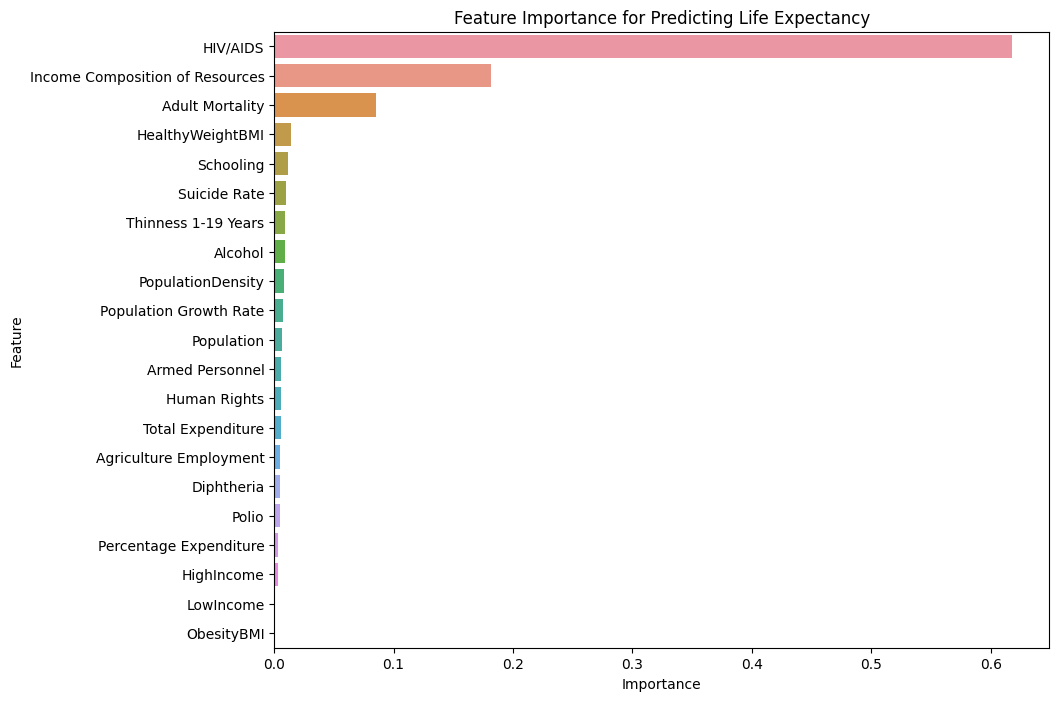

In [485]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Life Expectancy')
plt.show()
